# Modify Battery Storage Parameters Example
---
In this example, we will show how to modify the battery storage parameters in the hybrid plant simulation. The major change is from using the default dispatch which is a profit maximization objective function to a load following objective function. The load follow objective will minimize system operating costs while load following.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
import numpy as np

from hopp import ROOT_DIR
from hopp.simulation import HoppInterface
from hopp.utilities import load_yaml
from hopp.simulation.technologies.sites import SiteInfo, flatirons_site
from hopp.tools.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)


/Users/kbrunik/github/HOPP/examples/log/hybrid_systems_2024-08-26T07.25.57.615797.log


/Users/kbrunik/anaconda3/envs/gh/lib/python3.8/site-packages/fastkml/config.py:28: UserWarning: Package `lxml` missing. Pretty print will be disabled
  warnings.warn("Package `lxml` missing. Pretty print will be disabled")


### Set Site Information
Set wind and solar resource data at plant location and load pricing data. In this example, we use the Flatirons site as an example location.



**NOTE**: For a load following objective function the `desired_schedule` must be set. You can also specify `curtailment_value_type` to either _"grid"_ or _"desired_schedule"_. If you select _"grid"_ the system will curtail energy at the interconnection limit but optimize to meet the `desired_schedule` load and if you select _"desired_schedule"_ it curtails energy above the `desired_schedule` and optimizes to meet the `desired_schedule` load.

In [2]:
DEFAULT_SOLAR_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "solar" / "35.2018863_-101.945027_psmv3_60_2012.csv"
DEFAULT_WIND_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "wind" / "35.2018863_-101.945027_windtoolkit_2012_60min_80m_100m.srw"
DEFAULT_PRICE_FILE = ROOT_DIR.parent / "resource_files" / "grid" / "pricing-data-2015-IronMtn-002_factors.csv"

baseload_limit_kw = float(30 * 1000)
baseload_percent = 95.0
DEFAULT_LOAD = baseload_limit_kw*np.ones((8760))/1000

site = SiteInfo(
        flatirons_site,
        solar_resource_file=DEFAULT_SOLAR_RESOURCE_FILE,
        wind_resource_file=DEFAULT_WIND_RESOURCE_FILE,
        grid_resource_file=DEFAULT_PRICE_FILE,
        desired_schedule=DEFAULT_LOAD,
        curtailment_value_type="grid",
        solar=True,
        wind=True,
        wave=False
    )

### Create the HOPP Model
To generate the HOPP Model, instantiate the `HoppInterface` class and supply the required YAML configuration.

`HOPPInterface` is capable of handling dictionary input as well as class instances. Here we demonstrate this by loading the YAML file as a dict, modifying it to include our site information, then passing it as an argument to `HoppInterface`. This is useful for programmatic configuration of simulation configs.

In [3]:
hopp_config = load_yaml("./inputs/04-load-following-battery.yaml")
# set SiteInfo instance
hopp_config["site"] = site

### Create the Simulation Model
Instantiate the `HoppInterface` class by providing our modified configuration dict.

In [4]:
hi = HoppInterface(hopp_config)

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [7]:
hi.simulate(project_life=25)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [12]:
hybrid_plant = hi.system

print("Annual Energies (kWh):")
print(hybrid_plant.annual_energies)

print("\n Number of timesteps the load is met:")
print(hybrid_plant.grid.time_load_met)

print("\n Total Missed Load:")
print(sum(hybrid_plant.grid.missed_load), "kWh")

print("\n Percentage of the load that is missed:")
print(hybrid_plant.grid.missed_load_percentage)

Annual Energies (kWh):
{"pv": 104289820.46167283, "wind": 156936144.3525466, "battery": -494041.42678035283, "hybrid": 260731923.3874374}

 Number of timesteps the load is met:
56.461187214611876

 Total Missed Load:
1654492284.445089 kWh

 Percentage of the load that is missed:
0.2518253096567868


### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

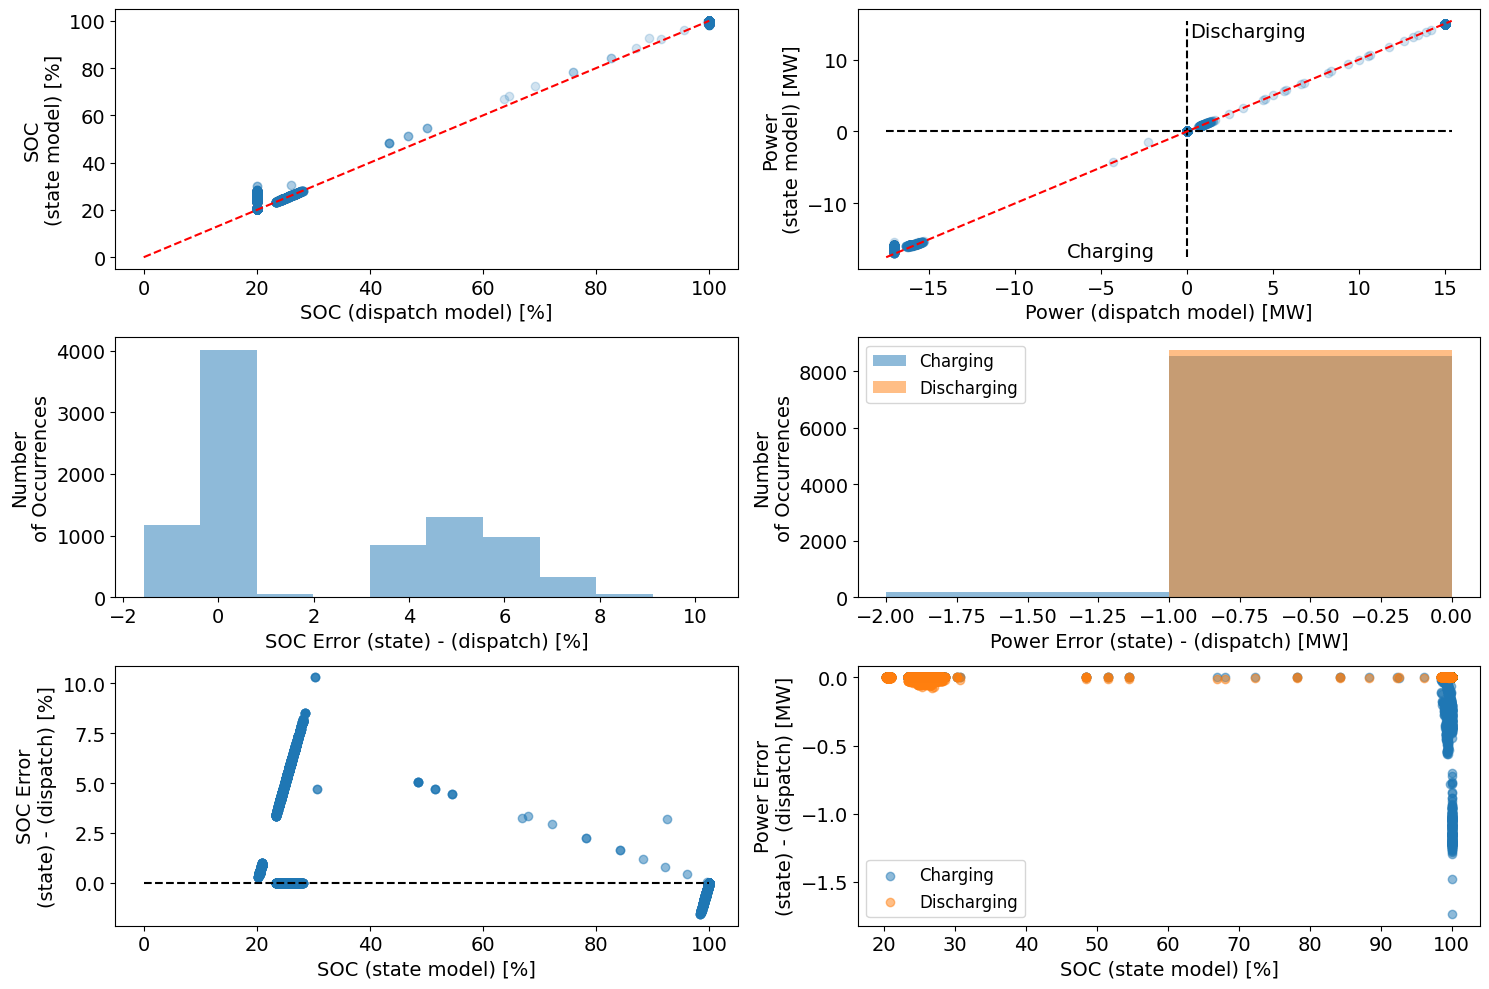

In [13]:
plot_battery_dispatch_error(hybrid_plant)

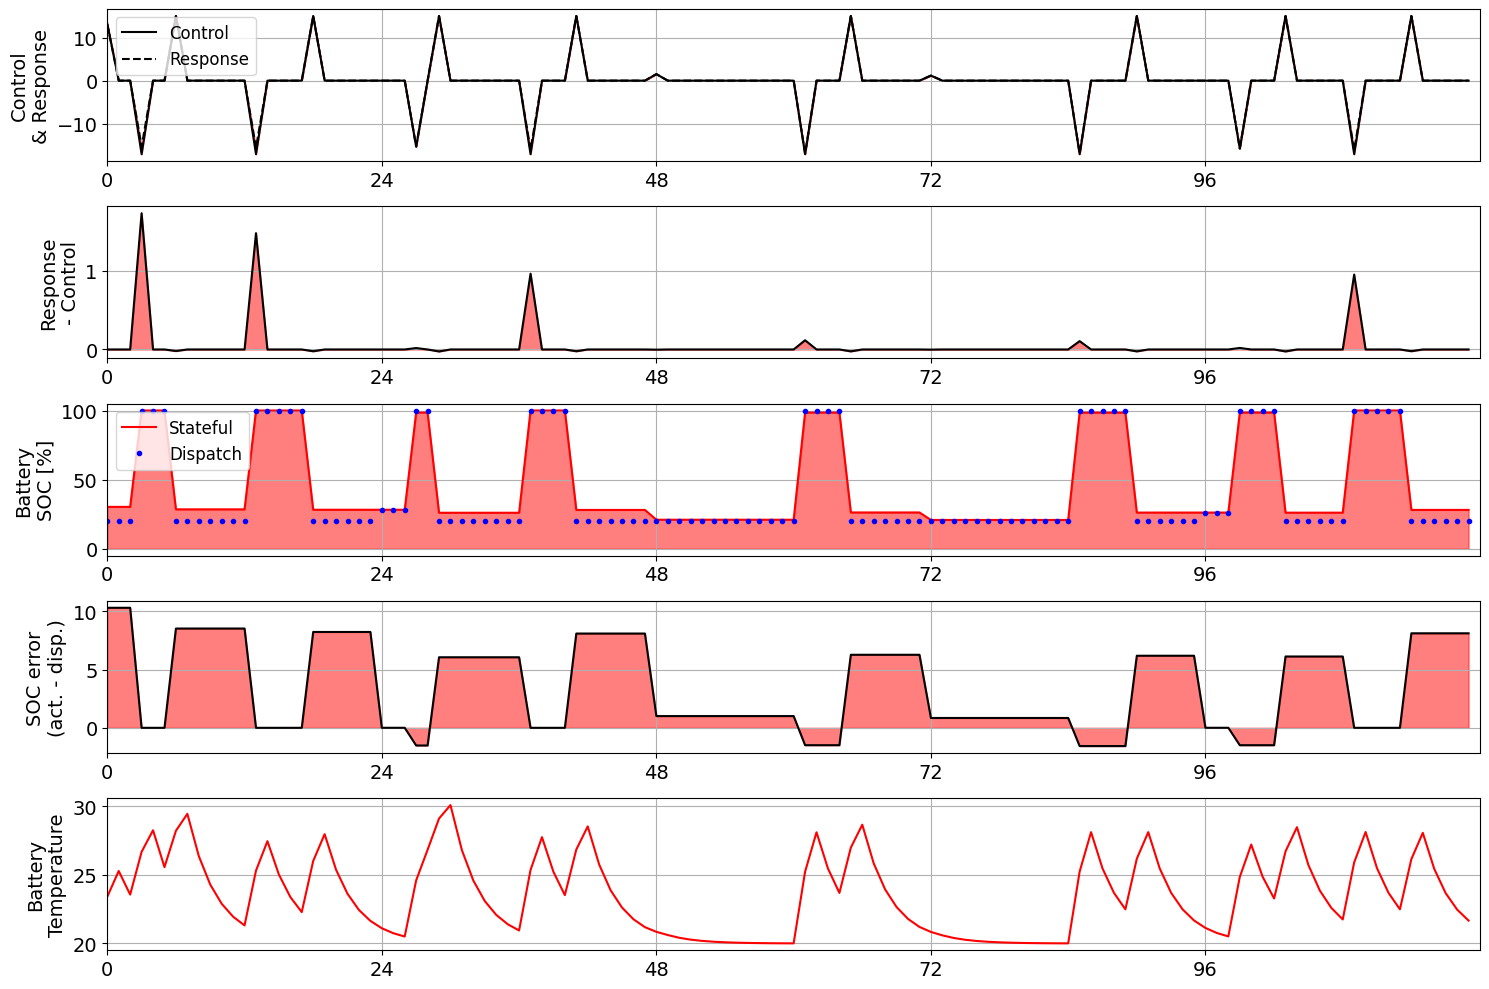

In [14]:
plot_battery_output(hybrid_plant)

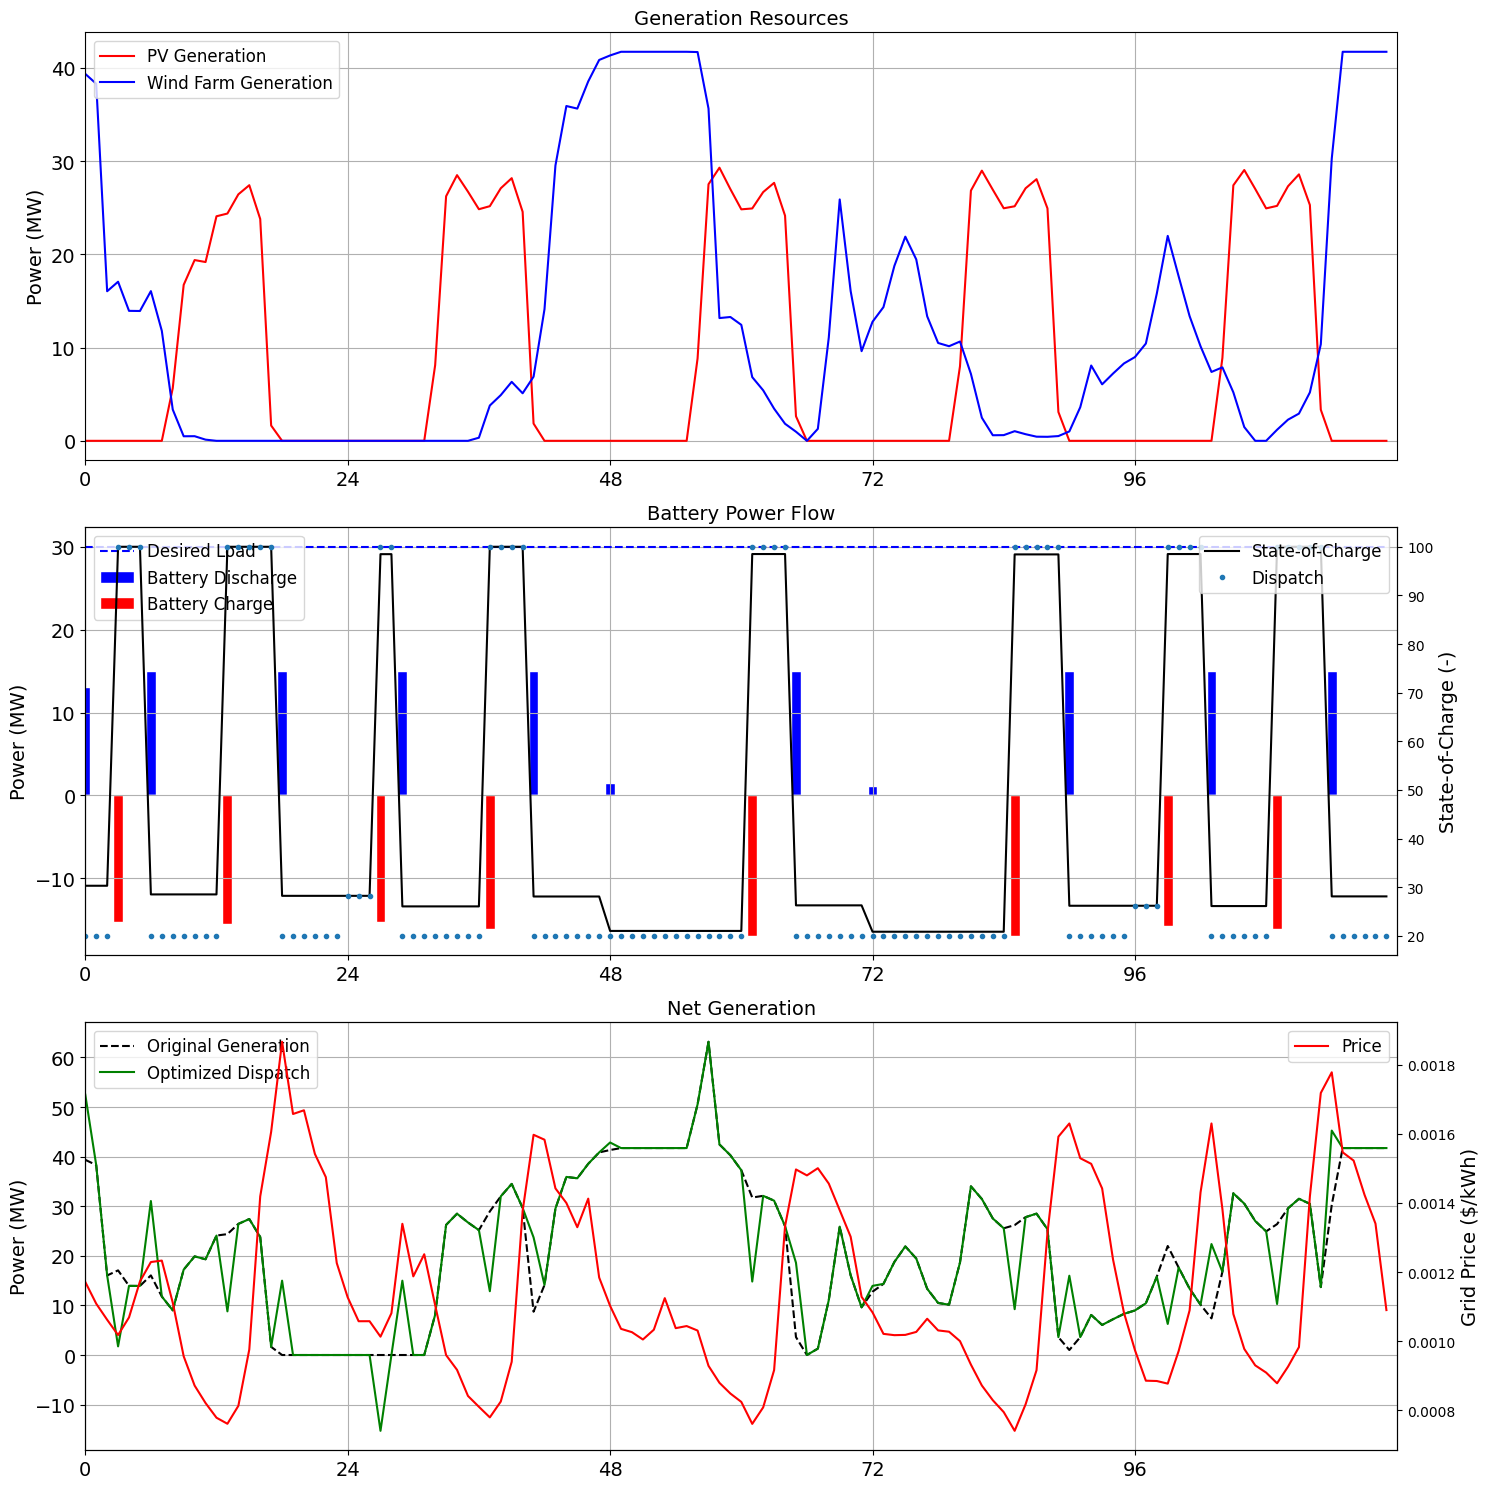

In [15]:
plot_generation_profile(hybrid_plant)